In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import statistics

# Data scraping
parte 1 do trabalho em que foi realizado o web scraping do site abaixo

In [2]:
#https://www.basketball-reference.com/leagues/NBA_2022_per_game.html #site de onde tirei os dados do meu data set

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html' #passando a url para uma variável
df = pd.read_html(url) #pegando os dados da tabela do site usando "read_html()"
df

[      Rk             Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
 0      1   Precious Achiuwa   C  22  TOR  73  28  23.6  3.6   8.3  ...  .595   
 1      2       Steven Adams   C  28  MEM  76  75  26.3  2.8   5.1  ...  .543   
 2      3        Bam Adebayo   C  24  MIA  56  56  32.6  7.3  13.0  ...  .753   
 3      4       Santi Aldama  PF  21  MEM  32   0  11.3  1.7   4.1  ...  .625   
 4      5  LaMarcus Aldridge   C  36  BRK  47  12  22.3  5.4   9.7  ...  .873   
 ..   ...                ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...   
 837  601     Thaddeus Young  PF  33  TOR  26   0  18.3  2.6   5.5  ...  .481   
 838  602         Trae Young  PG  23  ATL  76  76  34.9  9.4  20.3  ...  .904   
 839  603     Omer Yurtseven   C  23  MIA  56  12  12.6  2.3   4.4  ...  .623   
 840  604        Cody Zeller   C  29  POR  27   0  13.1  1.9   3.3  ...  .776   
 841  605        Ivica Zubac   C  24  LAC  76  76  24.4  4.1   6.5  ...  .727   
 
      ORB  DRB   TRB  AST 

In [4]:
#porém, os dados estão meio bagunçados, pois há linhas que não são úteis para nosso data set
df2 = df[0]

In [5]:
df2[df2.PTS == 'PTS']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
26,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
74,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
103,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
157,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
184,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
212,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
249,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
272,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [6]:
df = df2.drop(df2[df2.PTS == 'PTS'].index) #apagando todas as linhas da tabela que contém linhas "lixo"
df.shape #mostrando como ficaram as dimensões da tabela atualizada
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [7]:
df2.shape #comparando com as dimensões antigas da tabela

(842, 30)

In [8]:
df = df.drop("Rk",axis = 'columns') #deletando a coluna 'Rk' que seria o ranking de cada jogador em determinada estatística sistematizado pelo site, mas não seria útil para o nosso dataset
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [9]:
df.to_csv('nba_stats.csv', index = False) #passando o dataframe para um arquivo csv

In [10]:
df['PTS']=pd.to_numeric(df['PTS'],errors='coerce')
df['AST']=pd.to_numeric(df['AST'],errors='coerce')
df['MP']=pd.to_numeric(df['MP'],errors='coerce')
df['TOV']=pd.to_numeric(df['TOV'],errors='coerce')
df['STL']=pd.to_numeric(df['STL'],errors='coerce')
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,.465,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,.460,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,.526,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,.567,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


# Parte 2 do trabalho
aqui fizemos a analise exploratória dos dados

In [11]:
#média de cada coluna representada abaixo
print('Média de pontos: ',df['PTS'].mean())
print('Média de assistências: ',df['AST'].mean())
print('Média de minutos jogados: ',df['MP'].mean())
print('Média de Turnovers: ',df['TOV'].mean())
print('Média de roubos de bola: ',df['STL'].mean())
print('Média de idade: ',df['Age'].mean())

Média de pontos:  7.812192118226601
Média de assistências:  1.8082512315270938
Média de minutos jogados:  18.264655172413796
Média de Turnovers:  0.9786945812807881
Média de roubos de bola:  0.5827586206896551
Média de idade:  26.051724137931036


In [12]:
print('Mediana de pontos: ',df['PTS'].median())
print('Mediana de assistências: ',df['AST'].median())
print('Mediana de minutos jogados: ',df['MP'].median())
print('Mediana de Turnovers: ',df['TOV'].median())
print('Mediana de roubos de bola: ',df['STL'].median())
print('Mediana de idade: ',df['Age'].median())

Mediana de pontos:  6.3
Mediana de assistências:  1.2
Mediana de minutos jogados:  17.5
Mediana de Turnovers:  0.8
Mediana de roubos de bola:  0.5
Mediana de idade:  25.0


In [13]:
print('Moda de pontos: ',statistics.mode(df['PTS']))
print('Moda de assistências: ',statistics.mode(df['AST']))
print('Moda de minutos jogados: ',statistics.mode(df['MP']))
print('Moda de Turnovers: ',statistics.mode(df['TOV']))
print('Moda de roubos de bola: ',statistics.mode(df['STL']))
print('Moda de idade: ',statistics.mode(df['Age']))

Moda de pontos:  0.0
Moda de assistências:  0.0
Moda de minutos jogados:  3.0
Moda de Turnovers:  0.0
Moda de roubos de bola:  0.5
Moda de idade:  24


In [14]:
#desvio padrão de cada coluna abaixo
print(df['PTS'].std())
print(df['AST'].std())
print(df['MP'].std())
print(df['TOV'].std())
print(df['STL'].std())
print(df['Age'].std())

6.1382660305606915
1.838080110244224
9.649056201391826
0.8179410982867488
0.4254519910142862
4.0596397868253655


In [15]:
#tabela de frequência das colunas
tabela_frequencia1 = df['PTS'].value_counts().reset_index()
tabela_frequencia1.columns = ['Valor', 'Frequência']

tabela_frequencia2 = df['AST'].value_counts().reset_index()
tabela_frequencia2.columns = ['Valor', 'Frequência']

tabela_frequencia3 = df['MP'].value_counts().reset_index()
tabela_frequencia3.columns = ['Valor', 'Frequência']

tabela_frequencia4 = df['TOV'].value_counts().reset_index()
tabela_frequencia4.columns = ['Valor', 'Frequência']

tabela_frequencia5 = df['STL'].value_counts().reset_index()
tabela_frequencia5.columns = ['Valor', 'Frequência']

tabela_frequencia6 = df['Age'].value_counts().reset_index()
tabela_frequencia6.columns = ['Valor', 'Frequência']

print(tabela_frequencia1)
print(tabela_frequencia2)
print(tabela_frequencia3)
print(tabela_frequencia4)
print(tabela_frequencia5)
print(tabela_frequencia6)

     Valor  Frequência
0      0.0          35
1      2.0          21
2      3.0          12
3      6.2          12
4      1.0          12
..     ...         ...
208   16.8           1
209   30.3           1
210   27.1           1
211    9.5           1
212   17.9           1

[213 rows x 2 columns]
    Valor  Frequência
0     0.0          63
1     1.0          51
2     0.5          49
3     0.3          41
4     0.6          38
..    ...         ...
77    6.8           1
78    7.4           1
79   10.5           1
80   10.2           1
81    9.7           1

[82 rows x 2 columns]
     Valor  Frequência
0      3.0          14
1      8.0           9
2     16.3           9
3      5.0           8
4      2.0           8
..     ...         ...
302   27.8           1
303   11.2           1
304   35.6           1
305    6.1           1
306   13.1           1

[307 rows x 2 columns]
    Valor  Frequência
0     0.0          73
1     0.5          67
2     1.0          66
3     0.3          62
4  

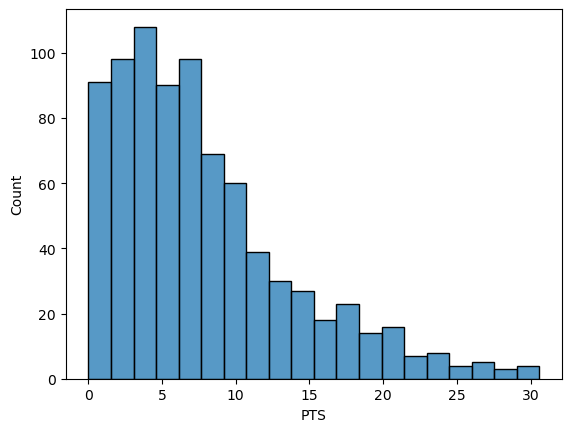

In [16]:
ax = sns.histplot(df['PTS'],kde=False)

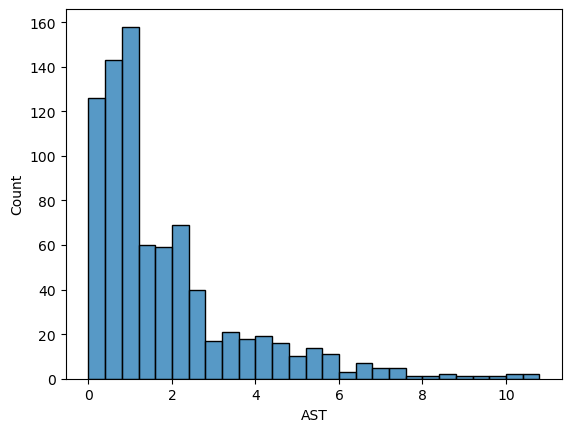

In [17]:
ax = sns.histplot(df['AST'],kde=False)

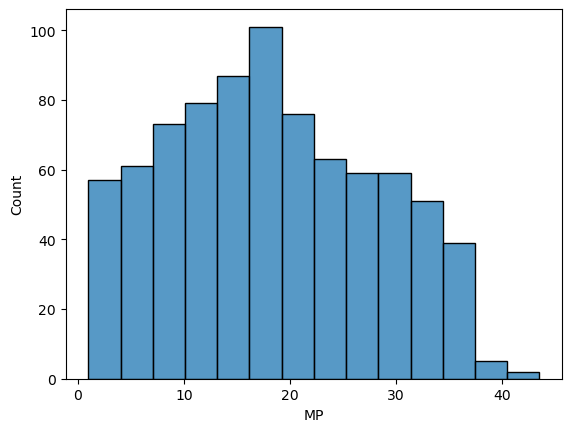

In [18]:
ax = sns.histplot(df['MP'],kde=False)

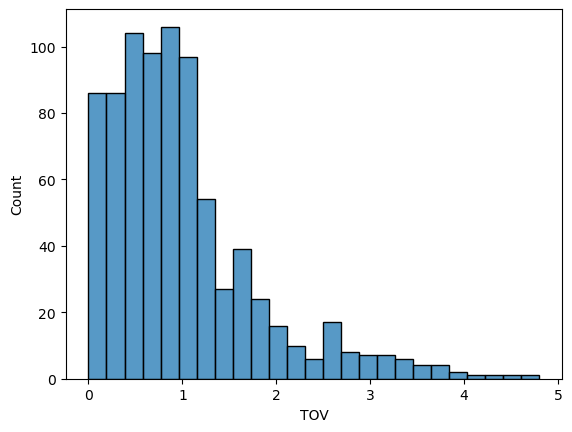

In [19]:
ax = sns.histplot(df['TOV'],kde=False)

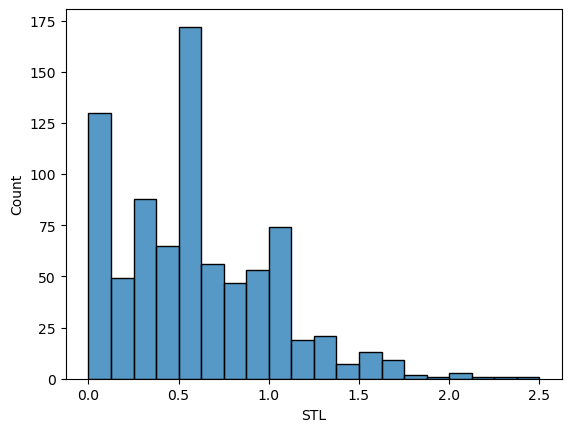

In [20]:
ax = sns.histplot(df['STL'],kde=False)

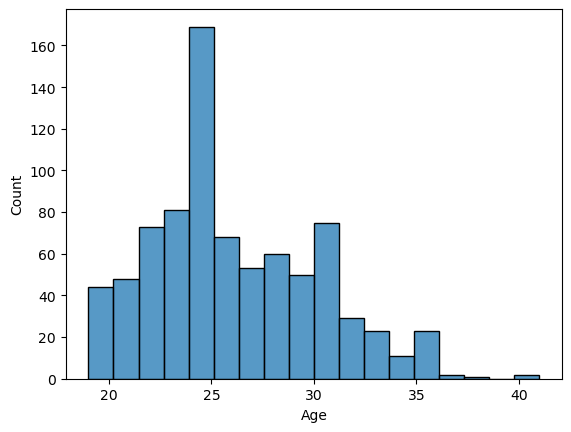

In [21]:
ax = sns.histplot(df['Age'],kde=False)

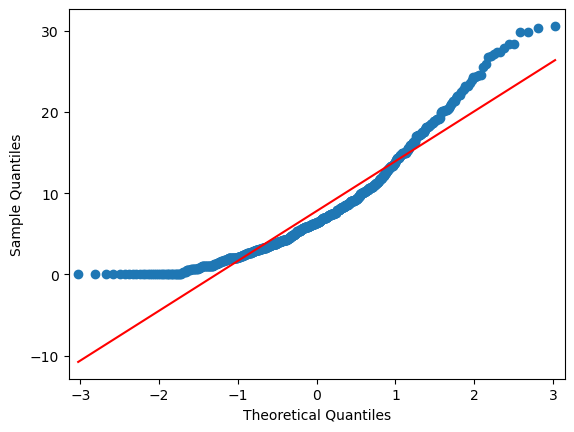

In [22]:
#qqplot serve para observarmos a semelhança entre os quantis do dataset com os quantis da distribuição esperada
sm.qqplot(df['PTS'],line='s')
plt.show()

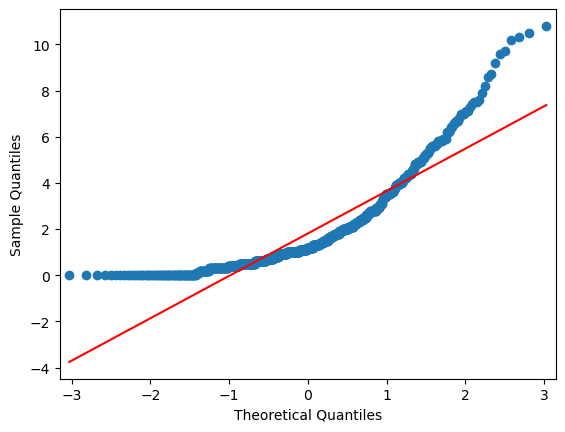

In [23]:
sm.qqplot(df['AST'],line='s')
plt.show()

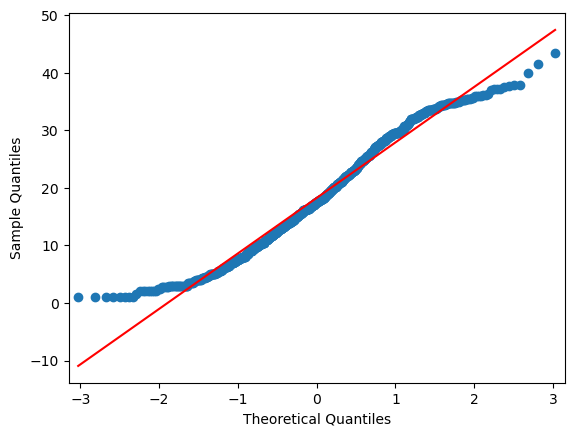

In [24]:
sm.qqplot(df['MP'],line='s')
plt.show()

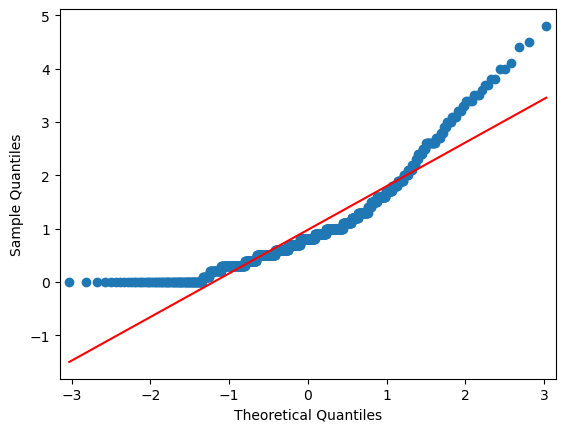

In [25]:
sm.qqplot(df['TOV'],line='s')
plt.show()

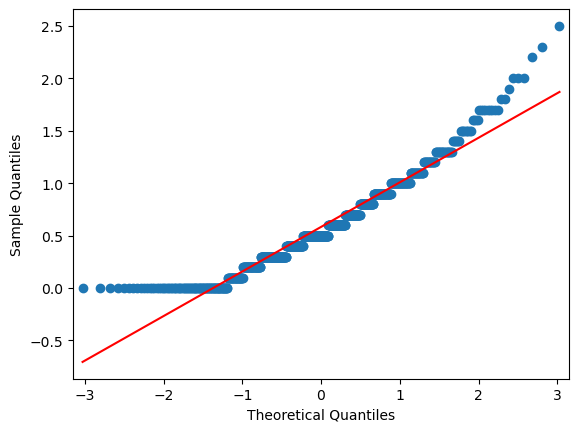

In [26]:
sm.qqplot(df['STL'],line='s')
plt.show()

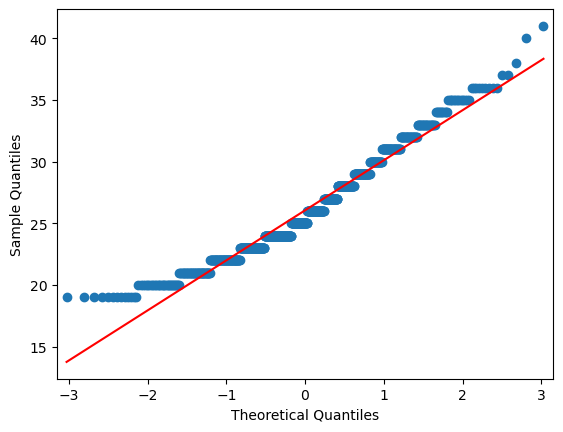

In [27]:
sm.qqplot(df['Age'],line='s')
plt.show()

<Axes: >

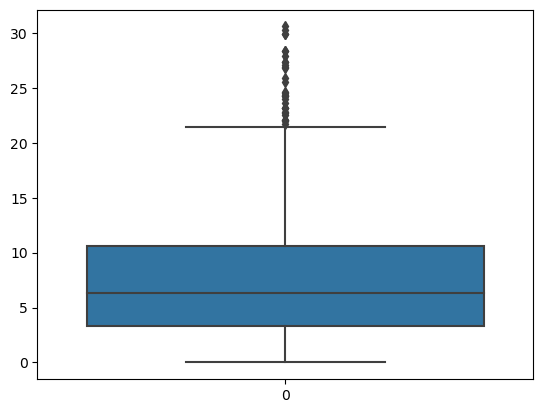

In [28]:
sns.boxplot(df['PTS']) #boxplot utilizado para verificar as medidas de dispersão e variabilidade

<Axes: >

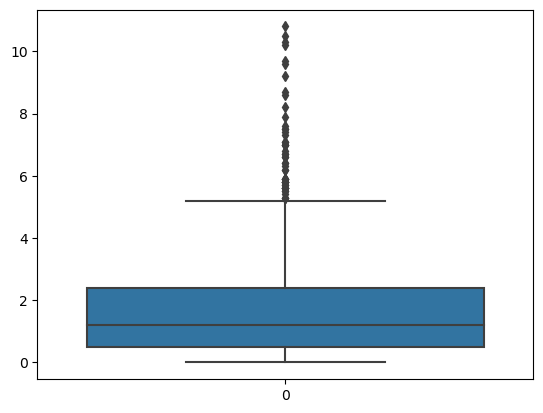

In [29]:
sns.boxplot(df['AST'])

<Axes: >

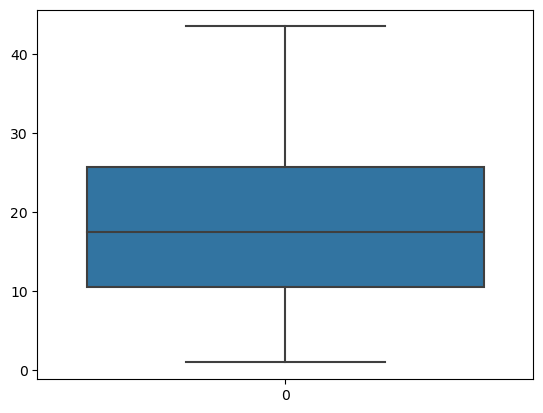

In [30]:
sns.boxplot(df['MP'])

<Axes: >

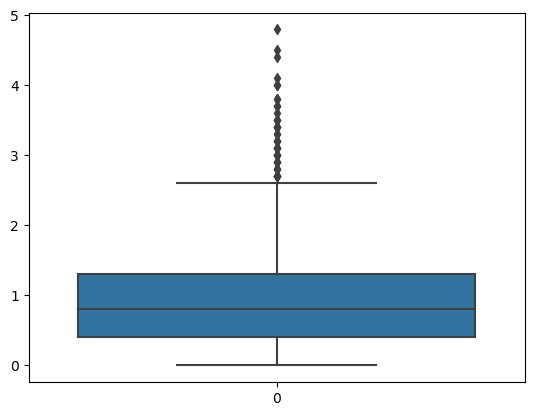

In [31]:
sns.boxplot(df['TOV'])

<Axes: >

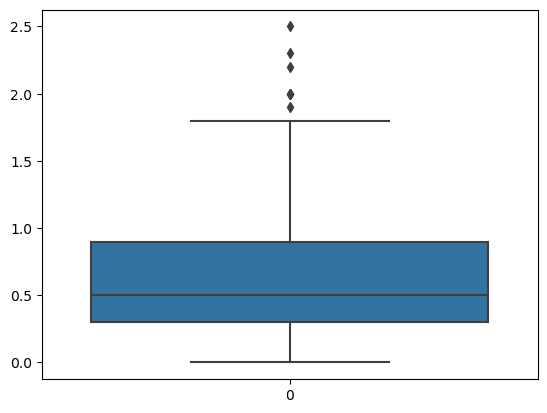

In [32]:
sns.boxplot(df['STL'])

<Axes: >

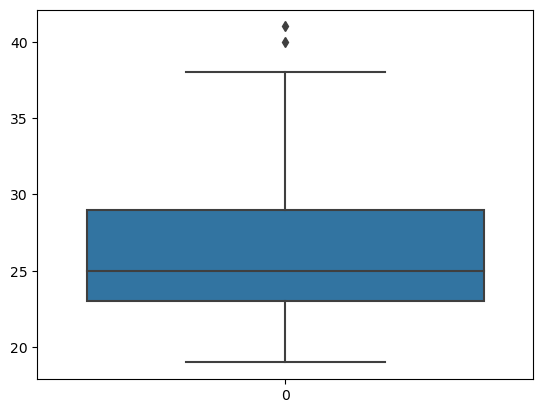

In [33]:
sns.boxplot(df['Age'])

In [34]:
df.corr()

C:\Users\USUÁRIO\AppData\Local\Temp\ipykernel_16376\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,MP,AST,STL,TOV,PTS
Age,1.000000,0.145453,0.171731,0.072693,0.096063,0.094723
MP,0.145453,1.000000,0.728132,0.717841,0.771398,0.887414
AST,0.171731,0.728132,1.000000,0.672747,0.841705,0.724987
STL,0.072693,0.717841,0.672747,1.000000,0.650554,0.618818
TOV,0.096063,0.771398,0.841705,0.650554,1.000000,0.819828
PTS,0.094723,0.887414,0.724987,0.618818,0.819828,1.000000


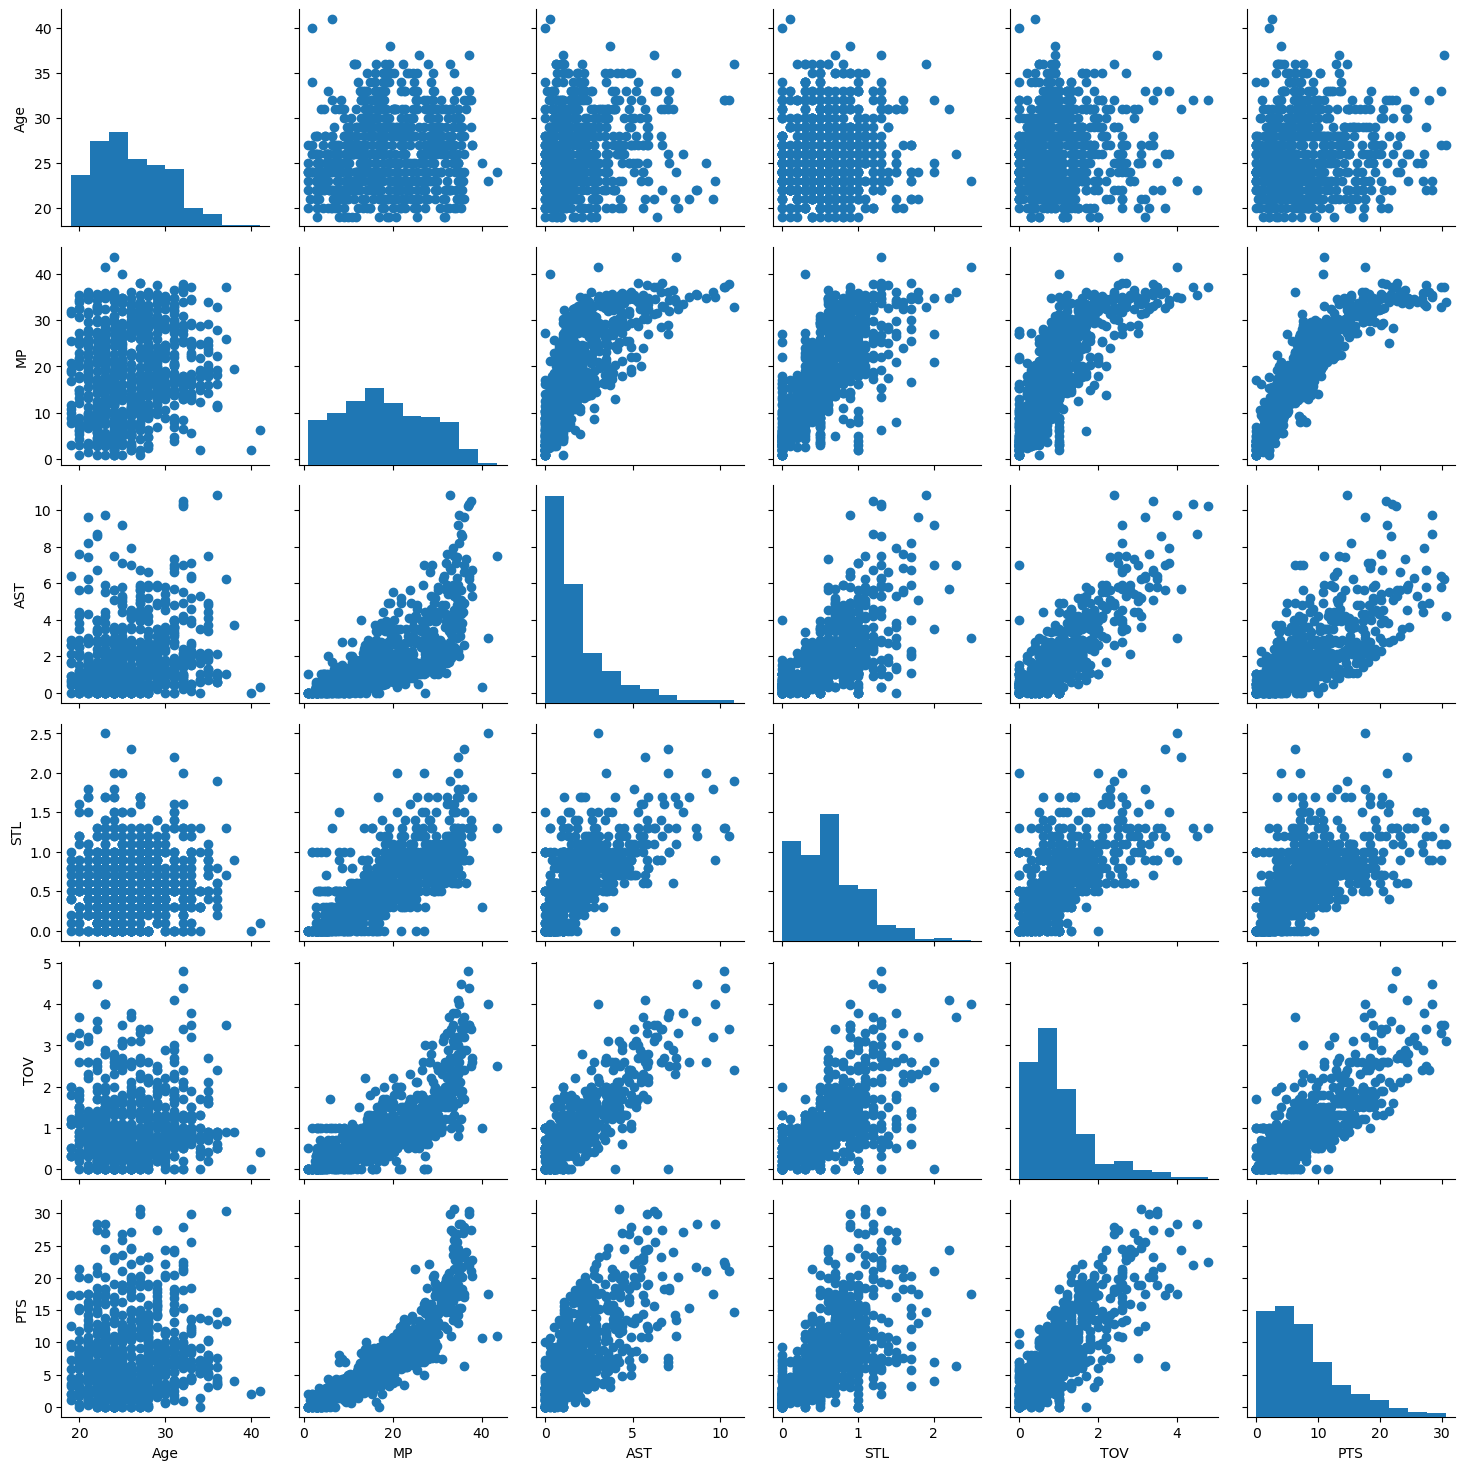

In [35]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)

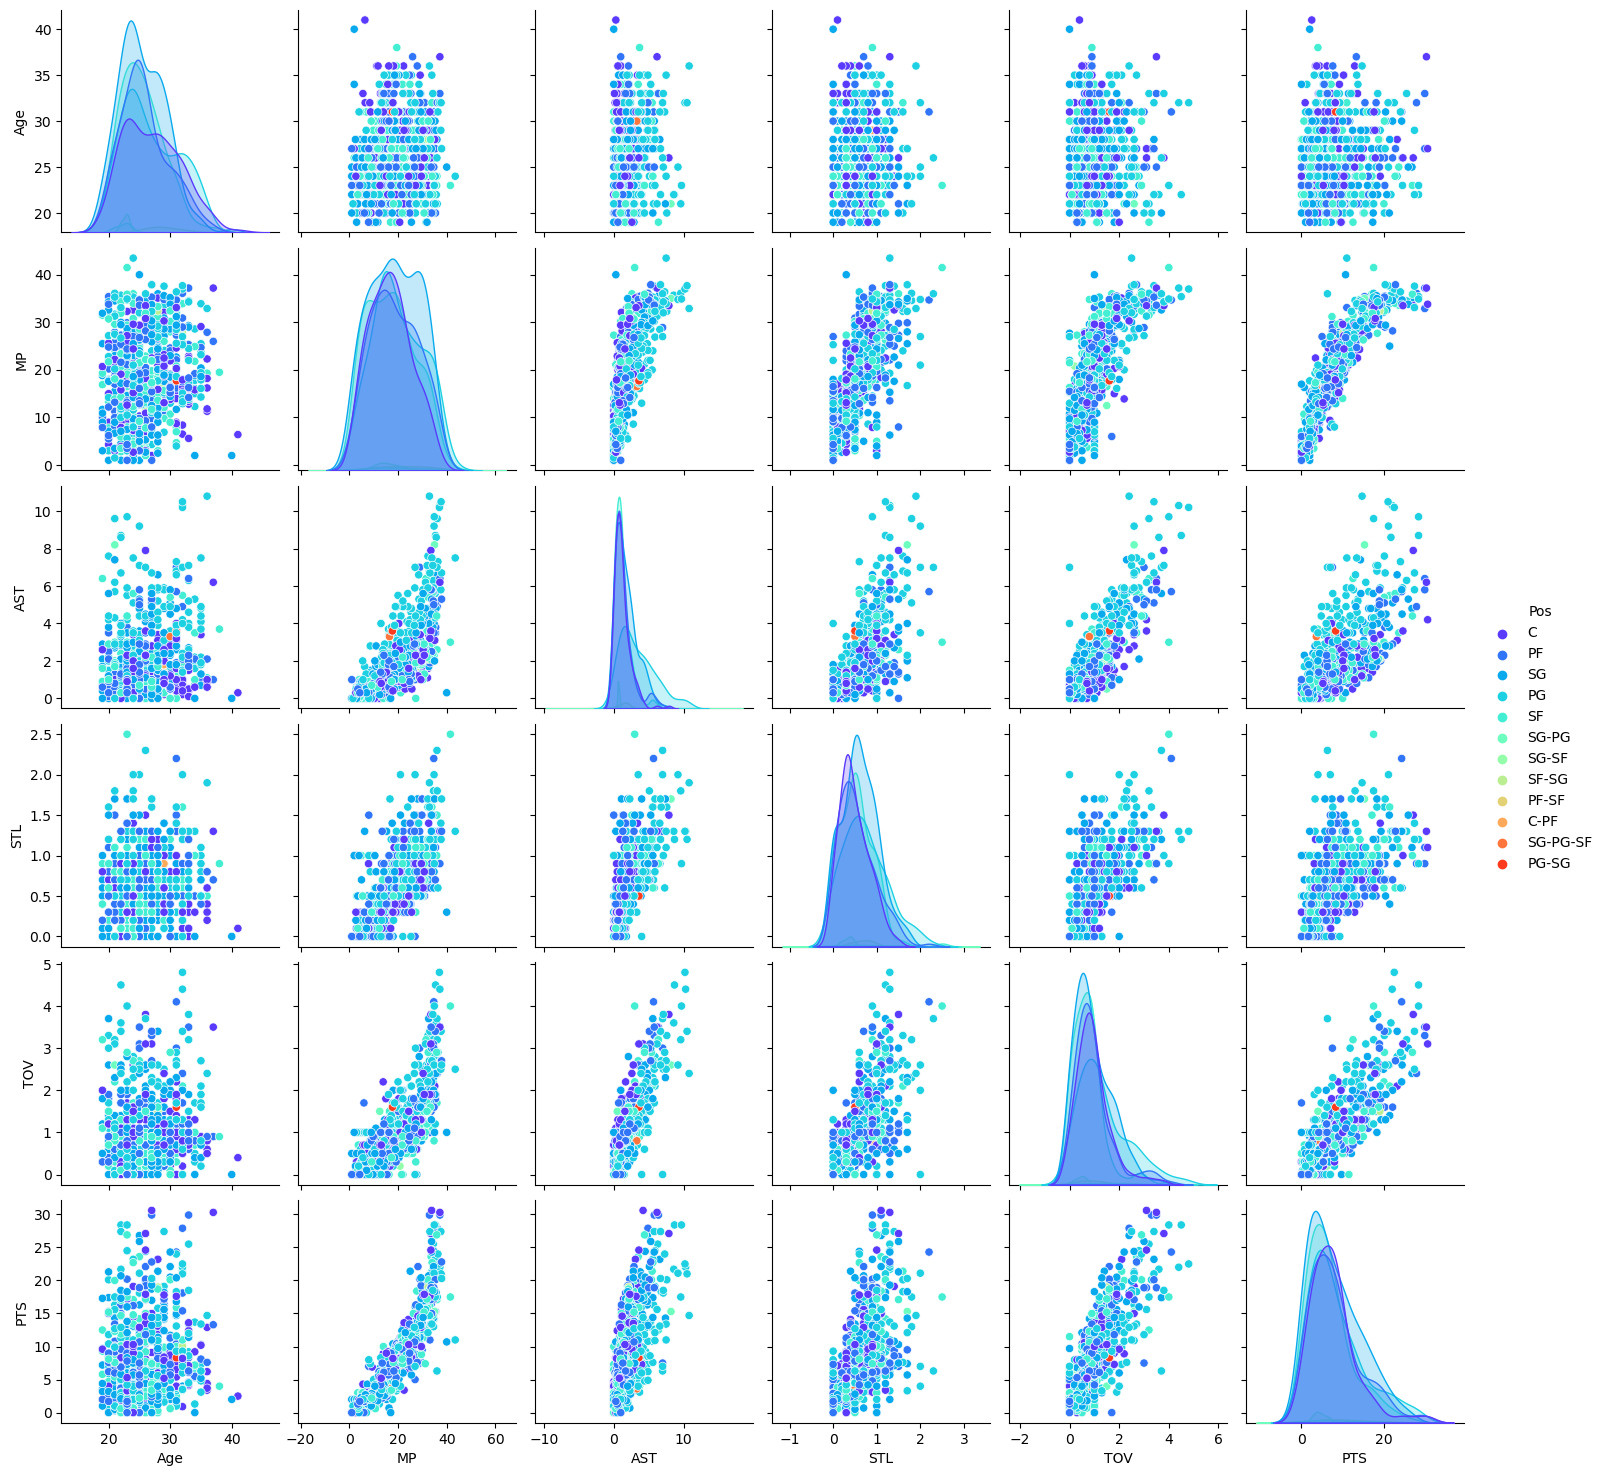

In [36]:
sns.pairplot(df,hue='Pos',palette='rainbow')

# Teste de normalidade

In [37]:
y_std = scipy.stats.zscore(df['Age'].values)
y_std = y_std.flatten()
y_std

array([-0.99866529,  0.48020927, -0.5057071 , -1.24514438,  2.45204201,
       -0.7521862 , -0.7521862 , -0.7521862 , -0.01274892, -0.7521862 ,
       -0.7521862 ,  0.48020927,  0.48020927,  0.48020927,  0.48020927,
        0.23373017,  0.72668836,  2.69852111, -1.24514438, -0.5057071 ,
        0.23373017,  2.45204201,  1.95908383,  1.95908383,  1.95908383,
       -1.24514438, -1.24514438, -0.7521862 , -0.99866529, -0.99866529,
       -0.99866529, -0.99866529, -1.49162348, -0.5057071 , -0.7521862 ,
       -0.7521862 , -0.99866529,  0.23373017,  0.72668836, -1.49162348,
       -1.24514438,  1.21964655, -0.01274892, -1.24514438, -0.01274892,
        1.71260473,  1.46612564, -1.24514438,  0.48020927, -0.25922801,
        0.23373017,  0.23373017,  0.23373017,  0.23373017,  0.72668836,
        0.72668836,  0.72668836,  1.71260473, -0.99866529,  0.72668836,
       -0.99866529,  0.72668836,  1.71260473,  1.46612564, -0.01274892,
        0.72668836,  1.46612564, -0.99866529, -1.24514438, -0.99

In [38]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.1245033427927672
9.908325249455094e-12


In [39]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


In [40]:
y_std = scipy.stats.zscore(df['MP'].values)
y_std = y_std.flatten()
y_std

array([ 0.55328035,  0.83327292,  1.48658893, -0.72224139,  0.41846911,
        0.44957939,  0.83327292, -0.86742272,  0.93697388,  1.45547865,
       -0.29706747,  0.15921672, -0.26595719,  0.25254758,  0.33550835,
        1.51769922, -0.86742272,  0.80216264,  1.39325808,  1.83917218,
       -1.10593492,  0.10736625, -0.22447681, -0.33854786, -0.04818518,
        0.61550092, -1.5933294 ,  1.16511598, -0.70150119,  0.58439063,
        0.37698873,  0.92660378,  1.45547865,  1.69399084,  0.77105235,
        1.19622626, -0.76372177, -1.44814806,  1.59028989,  1.77695161,
        1.68362075,  1.43473846, -1.53110883, -1.1370452 , -0.21410671,
        0.67772149, -0.44224881,  0.99919445,  1.83917218,  0.69846168,
       -1.68666026,  0.00366529,  0.15921672, -0.89853301, -0.40076843,
       -0.36965814, -0.45261891,  0.73994207,  1.52806932, -0.02744499,
       -0.38002824, -0.43187871, -0.22447681,  0.71920187, -0.72224139,
        1.14437579,  1.31029731, -1.29259663, -1.17852558, -1.41

In [41]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.043343062859937276
0.04594877552749043


In [42]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados seguem uma distribuição normal


In [43]:
y_std = scipy.stats.zscore(df['AST'].values)
y_std = y_std.flatten()
y_std

array([-3.85558685e-01,  8.66518171e-01,  8.66518171e-01, -6.03311182e-01,
       -4.94434933e-01,  3.22136929e-01,  5.39889426e-01, -3.85558685e-01,
       -1.67806188e-01, -1.13368064e-01,  5.39889426e-01,  1.58822557e-01,
        1.04384433e-01,  1.58822557e-01,  4.85451302e-01,  2.17303315e+00,
       -7.12187430e-01, -4.39996809e-01,  2.11859503e+00,  4.31013178e-01,
       -7.66625554e-01, -3.85558685e-01,  4.99463085e-02,  2.13260681e-01,
       -1.13368064e-01,  1.04384433e-01, -6.57749306e-01, -2.22244312e-01,
       -9.84378051e-01, -5.48873057e-01, -6.57749306e-01, -3.85558685e-01,
        3.15291939e+00,  1.79196628e+00, -3.31120561e-01,  4.85451302e-01,
       -1.67806188e-01, -4.39996809e-01,  3.22136929e-01,  9.20956295e-01,
        6.48765674e-01,  1.13870879e+00, -9.84378051e-01, -8.21063678e-01,
       -6.03311182e-01, -5.89299398e-02, -4.94434933e-01, -2.22244312e-01,
        2.60853814e+00, -1.67806188e-01, -9.84378051e-01, -3.31120561e-01,
       -2.76682437e-01, -

In [44]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.16810132089825408
7.927307899299984e-21


In [45]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


In [46]:
y_std = scipy.stats.zscore(df['STL'].values)
y_std = y_std.flatten()
y_std

array([-0.19463918,  0.74611686,  1.92206192, -0.90020622, -0.66501721,
        0.27573884,  0.51092785, -0.66501721,  0.27573884,  0.51092785,
        1.68687291, -0.19463918, -0.66501721, -0.19463918,  1.21649489,
        1.21649489, -0.66501721,  0.27573884,  0.27573884,  2.15725093,
       -1.13539523, -0.19463918, -0.66501721, -0.66501721, -0.66501721,
        0.27573884, -1.37058424,  0.27573884, -1.13539523, -0.19463918,
       -0.66501721,  0.27573884,  2.39243995,  2.86281797, -0.19463918,
        1.4516839 , -0.42982819, -1.37058424,  0.27573884,  1.21649489,
        0.04054983,  0.51092785, -0.19463918, -0.90020622, -0.19463918,
        0.98130588,  0.04054983,  0.51092785,  0.74611686, -0.19463918,
        0.98130588,  0.74611686,  0.98130588, -0.66501721, -0.66501721,
       -0.66501721, -0.66501721,  1.4516839 ,  0.74611686, -0.19463918,
       -0.42982819, -0.66501721,  0.04054983,  1.68687291, -0.42982819,
        1.21649489, -0.19463918, -1.13539523, -0.90020622, -0.19

In [47]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.1141080994227251
5.743928230953514e-10


In [48]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


In [49]:
y_std = scipy.stats.zscore(df['TOV'].values)
y_std = y_std.flatten()
y_std

array([ 0.27073076,  0.63773139,  1.98340038, -0.58560405, -0.09626987,
        0.51539785,  0.88239848, -0.58560405, -0.34093696,  0.88239848,
       -0.34093696, -0.58560405, -0.34093696, -0.58560405,  0.02606367,
        2.83973518, -0.58560405, -0.09626987,  1.98340038,  0.88239848,
       -0.83027113, -0.58560405,  0.02606367,  0.39306431, -0.58560405,
        0.14839722, -1.19727177,  0.76006494, -0.34093696, -0.21860341,
       -0.34093696,  0.02606367,  2.83973518,  1.61639974,  0.14839722,
        0.63773139, -0.21860341, -0.83027113,  0.63773139,  1.00473203,
        1.4940662 ,  1.00473203,  0.02606367, -0.83027113, -0.21860341,
       -0.34093696, -0.58560405,  0.39306431,  2.96206873, -0.58560405,
       -1.19727177, -0.4632705 , -0.4632705 , -1.07493822, -0.83027113,
       -0.70793759, -0.95260468,  0.39306431,  0.27073076, -0.58560405,
       -0.09626987, -0.34093696,  0.27073076,  1.37173266, -0.58560405,
        0.14839722,  0.88239848, -0.83027113, -0.70793759, -1.07

In [50]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.16201706877574074
2.161102678127703e-19


In [51]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


In [52]:
y_std = scipy.stats.zscore(df['PTS'].values)
y_std = y_std.flatten()
y_std

array([ 2.09929253e-01, -1.48699051e-01,  1.84005790e+00, -6.05135073e-01,
        8.29378140e-01,  4.54448550e-01,  8.13076854e-01, -7.02942792e-01,
        5.35954983e-01,  1.35101931e+00, -2.79109343e-01, -2.30205483e-01,
       -5.72532500e-01, -1.65000337e-01, -3.45900452e-02,  3.60059685e+00,
       -6.86641506e-01,  8.94583286e-01,  1.38362188e+00,  1.51403217e+00,
       -1.01266724e+00, -6.21436360e-01, -4.09519635e-01, -3.93218349e-01,
       -4.09519635e-01,  9.58202470e-02, -1.22458396e+00,  1.53033346e+00,
       -5.07327354e-01,  5.68557556e-01,  2.42531826e-01,  1.10650001e+00,
        2.00307077e+00,  8.45679427e-01,  4.54448550e-01,  1.69334633e+00,
       -7.51846652e-01, -1.27348782e+00,  1.39992317e+00,  1.22060902e+00,
        1.98676948e+00,  1.12280130e+00, -7.84449225e-01, -7.84449225e-01,
       -3.44314489e-01,  7.95189605e-02, -7.19244079e-01,  4.87051123e-01,
        2.50841065e+00,  6.98967848e-01, -1.27348782e+00, -4.42122208e-01,
       -3.28013202e-01, -

In [53]:
D, p = scipy.stats.kstest(y_std,'norm',alternative='greater')
print(D) #distancia
print(p) #valor p

0.11108732061303478
1.74775238640131e-09


In [54]:
if D < p:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


# Best fit distribution

In [55]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [56]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [57]:
y_std = scipy.stats.zscore(df['Age'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value D<p
0          beta  0.077649  1.050670e-04  no
2         gamma  0.078038  9.519070e-05  no
5      pearson3  0.078041  9.511089e-05  no
9   weibull_min  0.081820  3.548076e-05  no
3       lognorm  0.084141  1.891663e-05  no
6             t  0.124500  1.984448e-11  no
4          norm  0.124503  9.908325e-12  no
7        triang  0.132820  5.947987e-13  no
1         expon  0.233209  2.552972e-39  no
8       uniform  0.342476  1.567257e-85  no
10  weibull_max  0.691042  0.000000e+00  no


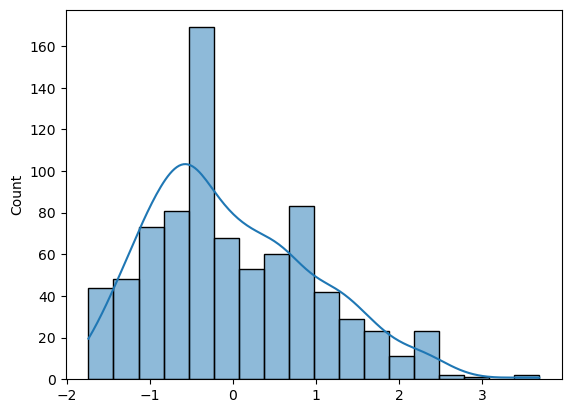

In [58]:
ax = sns.histplot(y_std,kde=True)

In [59]:
y_std = scipy.stats.zscore(df['MP'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value  D<p
0          beta  0.027472  5.628123e-01  yes
7        triang  0.037858  1.900244e-01  yes
4          norm  0.043343  4.594878e-02  yes
9   weibull_min  0.048670  4.128614e-02   no
6             t  0.049543  3.589405e-02   no
5      pearson3  0.051426  2.632107e-02   no
10  weibull_max  0.051649  2.535380e-02   no
3       lognorm  0.052529  2.183071e-02   no
2         gamma  0.054283  1.607933e-02   no
8       uniform  0.179606  2.174218e-23   no
1         expon  0.182583  3.671541e-24   no


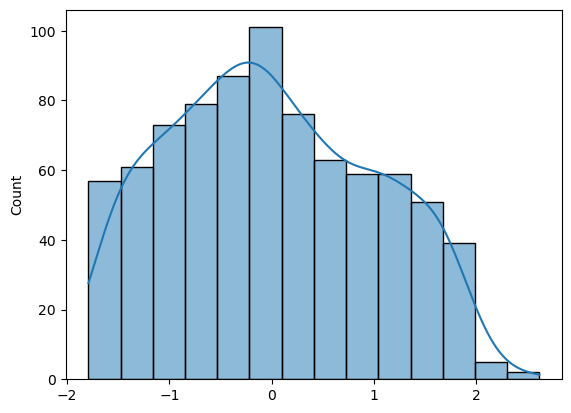

In [60]:
ax = sns.histplot(y_std,kde=True)

In [61]:
y_std = scipy.stats.zscore(df['AST'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)

C:\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.055433   1.308637e-02  no
1         expon  0.077586   1.067559e-04  no
9   weibull_min  0.078117   9.327368e-05  no
0          beta  0.087949   6.487484e-06  no
10  weibull_max  0.113640   1.367879e-09  no
2         gamma  0.142776   6.607816e-15  no
6             t  0.166412   4.020428e-20  no
4          norm  0.168101   7.927308e-21  no
5      pearson3  0.202141   1.456399e-29  no
7        triang  0.368181   3.161761e-99  no
8       uniform  0.547984  2.387684e-229  no


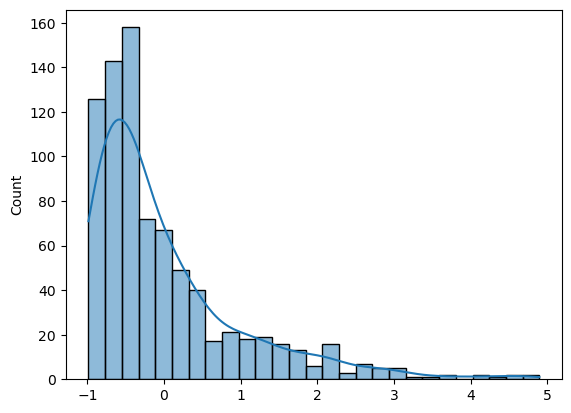

In [62]:
ax = sns.histplot(y_std,kde=True)

In [63]:
y_std = scipy.stats.zscore(df['STL'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)

C:\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.076932   1.259137e-04  no
3       lognorm  0.084209   1.856672e-05  no
6             t  0.098744   2.412006e-07  no
9   weibull_min  0.110871   3.781338e-09  no
4          norm  0.114108   5.743928e-10  no
2         gamma  0.117350   3.365858e-10  no
5      pearson3  0.117353   3.361191e-10  no
1         expon  0.181932   5.429021e-24  no
7        triang  0.233055   2.878947e-39  no
0          beta  0.456813  2.029393e-155  no
8       uniform  0.471921  1.798075e-166  no


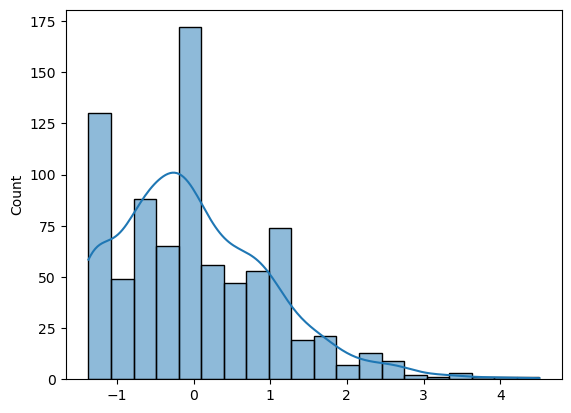

In [64]:
ax = sns.histplot(y_std,kde=True)

In [65]:
y_std = scipy.stats.zscore(df['TOV'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)

C:\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.064065   2.431153e-03  no
10  weibull_max  0.076952   1.252886e-04  no
6             t  0.114353   1.048467e-09  no
1         expon  0.142646   7.023381e-15  no
4          norm  0.162017   2.161103e-19  no
7        triang  0.309505   1.408171e-69  no
5      pearson3  0.351961   1.870999e-90  no
0          beta  0.461309  1.162367e-158  no
8       uniform  0.506260  2.576009e-193  no
9   weibull_min  0.528531  4.597722e-212  no
2         gamma  0.583289  5.127568e-263  no


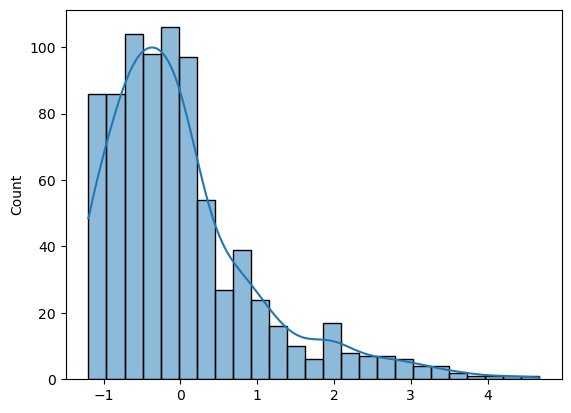

In [66]:
ax = sns.histplot(y_std,kde=True)

In [67]:
y_std = scipy.stats.zscore(df['PTS'].values)
y_std = y_std.flatten()
check_distribution(dist_names,y_std)

C:\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value  D<p
3       lognorm  0.031444   3.902267e-01  yes
9   weibull_min  0.037213   2.056032e-01  yes
2         gamma  0.041177   1.238819e-01  yes
5      pearson3  0.041183   1.237856e-01  yes
1         expon  0.100899   1.194276e-07   no
6             t  0.108391   9.202263e-09   no
4          norm  0.111087   1.747752e-09   no
7        triang  0.183677   1.894953e-24   no
0          beta  0.359011   3.270592e-94   no
8       uniform  0.411934  3.571792e-125   no
10  weibull_max  0.675733   0.000000e+00   no


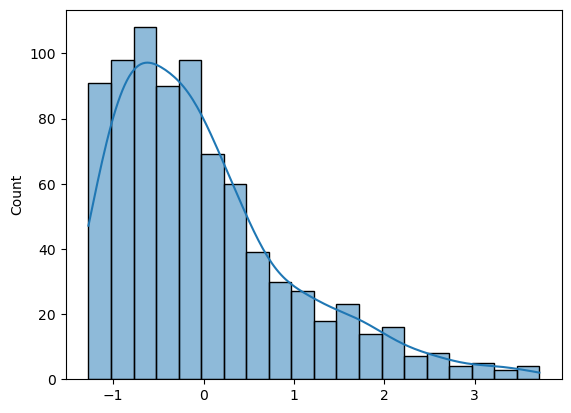

In [68]:
ax = sns.histplot(y_std,kde=True)

# Parte 3 do trabalho
Aqui a gente aplica um algoritmo de machine learning

In [69]:
def finalPos(pos):
    return pos.split('-')[0]

In [70]:
FG_median = df['FG%'].median()
threeP_median = df['3P%'].median()
twoP_median = df['2P%'].median()
eFG_median = df['eFG%'].median()
FT_median = df['FT%'].median()
df.fillna(FG_median,inplace=True)
df.fillna(threeP_median,inplace=True)
df.fillna(twoP_median,inplace=True)
df.fillna(eFG_median,inplace=True)
df.fillna(FT_median,inplace=True)

In [71]:
df['Pos'] = df['Pos'].apply(finalPos)

In [72]:
cat_feats = ['Player','Tm']

In [73]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [74]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 841
Columns: 661 entries, Pos to Tm_WAS
dtypes: float64(5), int64(1), object(21), uint8(634)
memory usage: 712.7+ KB


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = final_data.drop('Pos',axis=1)
y = final_data['Pos']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
from sklearn.svm import SVC

In [79]:
model = SVC()

In [80]:
model.fit(X_train,y_train)

SVC()

In [81]:
predictions = model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           C       0.70      0.47      0.56        45
          PF       0.00      0.00      0.00        57
          PG       0.20      0.13      0.16        39
          SF       0.00      0.00      0.00        56
          SG       0.30      0.90      0.45        71

    accuracy                           0.34       268
   macro avg       0.24      0.30      0.23       268
weighted avg       0.23      0.34      0.24       268



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print(confusion_matrix(y_test,predictions))

[[21  0  5  0 19]
 [ 8  0  6  0 43]
 [ 0  0  5  0 34]
 [ 1  0  2  0 53]
 [ 0  0  7  0 64]]


In [85]:
print(accuracy_score(y_test,predictions))

0.3358208955223881


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {'C':[0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [88]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [89]:
grid_predictions = grid.predict(X_test)

In [90]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           C       0.70      0.69      0.70        45
          PF       0.53      0.54      0.53        57
          PG       0.76      0.72      0.74        39
          SF       0.39      0.32      0.35        56
          SG       0.52      0.61      0.56        71

    accuracy                           0.56       268
   macro avg       0.58      0.58      0.58       268
weighted avg       0.56      0.56      0.56       268



In [91]:
print(confusion_matrix(y_test,grid_predictions))

[[31 10  0  2  2]
 [11 31  0  9  6]
 [ 0  0 28  2  9]
 [ 2 13  1 18 22]
 [ 0  5  8 15 43]]


In [92]:
print(accuracy_score(y_test,grid_predictions))

0.5634328358208955
